In this notebook, I have tried to make a program to find out how a stock is performing during the corona outbreak.   

Colab link to run the file: https://colab.research.google.com/drive/1Uy7GMXOpVi_6xvYjFIgasMCeXd8zxsaD

According to the site: https://www.pharmaceutical-technology.com/news/coronavirus-a-timeline-of-how-the-deadly-outbreak-evolved/    
January 22 and March 11 were two of many important events regarding coronavirus.  
(January 22: WHO hold on declaring international health emergency & March 11: WHO declares the outbreak to be a pandemic)  
events like these cause panic in the stock markets

The time is divided the time into 3 timelines  
Timeframe 1: Before January 22  
Timeframe 2: After Jan 22 and before March 11  
Timeframe 3: After March 11  

I have taken into consideration the Closing prices,Opening price,Returns, etc of the Stock  
and Total Cases, Cured, Deaths, Active Cases of Corona to do the analysis

This doesn't predict future prices. It is simply to understand how the stock that you give as input as performed in the various timelines

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\sayye\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
import pandas_datareader.data as web
import datetime

<font color=green> Now it will ask for a ticker symbol of a company you can put any one.</font>  
For e.g. You can type F (which is the ticker symbol for Ford) and press ENTER

In [3]:
ticker_symbol = input("Enter the ticker symbol of a company: ").upper().strip()

Enter the ticker symbol of a company: F


start and end are the dates from and to which you want to fetch the stock info

In [4]:
start = datetime.datetime(2019,11,4)
end = datetime.date.today()
print("Today's date:", end)

Today's date: 2020-04-28


In [5]:
#fetching the data of the stock and putting it in the dataframe ticker
ticker = web.DataReader(ticker_symbol,'yahoo',start,end)

In [6]:
ticker

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-04,9.05,8.93,8.93,9.00,46716500.0,8.849499
2019-11-05,9.15,9.00,9.02,9.02,37569700.0,8.869164
2019-11-06,9.05,8.89,9.05,8.92,39497700.0,8.770837
2019-11-07,9.01,8.88,8.96,8.89,32640400.0,8.741339
2019-11-08,9.04,8.82,8.90,9.04,29476800.0,8.888829
...,...,...,...,...,...,...
2020-04-21,4.92,4.72,4.89,4.77,82400200.0,4.770000
2020-04-22,4.89,4.75,4.87,4.77,62398600.0,4.770000
2020-04-23,4.98,4.77,4.80,4.89,61959800.0,4.890000


In [7]:
ticker.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2019-11-04 to 2020-04-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       120 non-null    float64
 1   Low        120 non-null    float64
 2   Open       120 non-null    float64
 3   Close      120 non-null    float64
 4   Volume     120 non-null    float64
 5   Adj Close  120 non-null    float64
dtypes: float64(6)
memory usage: 6.6 KB


In [8]:
#checking data types of the columns in ticker
ticker.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [9]:
#checking data type of the date index of ticker
ticker.index.dtype

dtype('<M8[ns]')

In [10]:
#checking for null values
ticker.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

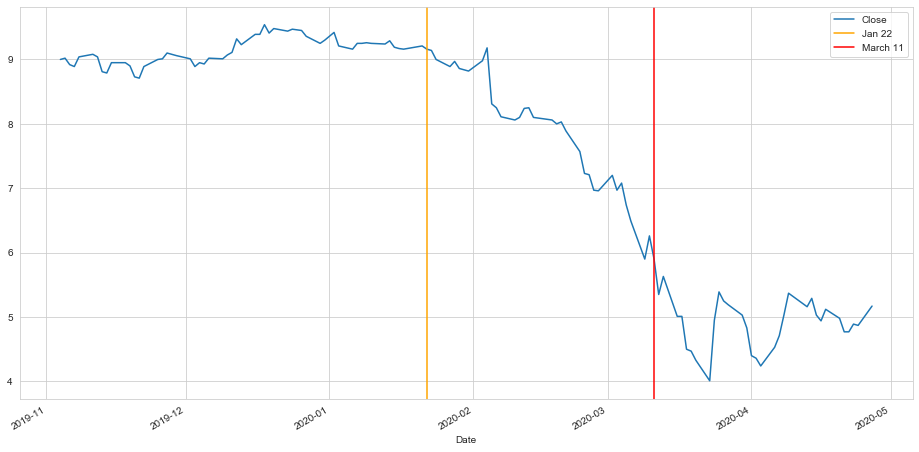

In [11]:
#This is a line graph and the two vertical lines are markings of the dates
#January 22 : WHO hold on declaring international health emergency 
#March 11   : WHO declares the outbreak to be a pandemic 
ticker['Close'].plot(figsize=(16,8))
plt.axvline('2020-01-22', 0, 1, label='Jan 22', color='orange') #Jan 22                                   
plt.axvline('2020-03-11', 0, 1, label='March 11', color='red')  #March 11
plt.legend();

In [12]:
#making a new column in the dataframe called Returns, having the returns of the stock
ticker['Returns'] = ticker['Close'].pct_change()

In [13]:
#checking if the column is inserted
ticker.head()

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2019-11-04,9.05,8.93,8.93,9.00,46716500.0,8.849499,NaN
2019-11-05,9.15,9.00,9.02,9.02,37569700.0,8.869164,0.002222
2019-11-06,9.05,8.89,9.05,8.92,39497700.0,8.770837,-0.011087
2019-11-07,9.01,8.88,8.96,8.89,32640400.0,8.741339,-0.003363
2019-11-08,9.04,8.82,8.90,9.04,29476800.0,8.888829,0.016873


In [14]:
print('The minimum returns for the stock was ' + str(ticker['Returns'].min()))
print('And the day was ' + str(ticker['Returns'].idxmin()))

The minimum returns for the stock was -0.11012431135992096
And the day was 2020-03-16 00:00:00


In [15]:
print('The maximum returns for the stock was ' + str(ticker['Returns'].max()))
print('And the day was ' + str(ticker['Returns'].idxmax()))

The maximum returns for the stock was 0.2344138470648951
And the day was 2020-03-24 00:00:00


Now, Plotting the standard deviation of the returns in the three timeframes to see how the returns was varying at different time  
Timeframe 1: Before January 22  
Timeframe 2: After Jan 22 and before March 11  
Timeframe 3: After March 11 


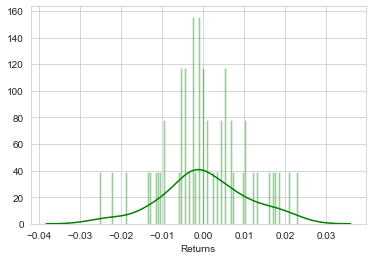

In [16]:
#dist plot of returns before yellow line i.e Timeframe 1(before Jan22)
sns.distplot(ticker.loc['2019-11-05':'2020-01-22']['Returns'],color='green',bins=100);

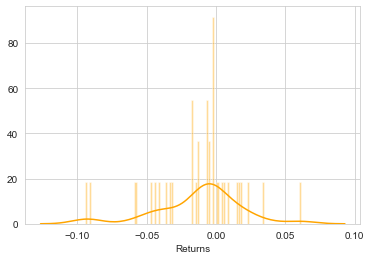

In [17]:
#dist plot of returns between yellow and red i.e Timeframe 2 (after Jan22 and before March11)
sns.distplot(ticker.loc['2020-01-22':'2020-03-11']['Returns'],color='orange',bins=100);

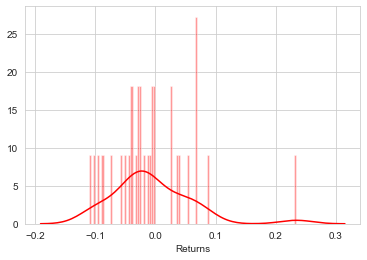

In [18]:
#dist plot of returns after red line i.e. Timeframe 3 (after March 11)
sns.distplot(ticker.loc['2020-03-11':'2020-04-24']['Returns'],color='red',bins=100);

We can see that in the standard deviation of returns is very different in different timeframes 
Note: The standard deviation of returns gives an idea of how much the returns are varying from the mean  

In case of the Ford stock(ticker symbol: F)  
In Timeframe 1 it is varying in the range ±0.03  
In Timeframe 2 it is varying in the range ±0.10  
In Timeframe 1 it is varying in the range ±0.25  
The Standard deviation of the returns   

In [19]:
import plotly
import cufflinks as cf
cf.go_offline()
from plotly.offline import iplot

Lets take a look at the sentiment of the market towards the stock in different timeframes using Candlestick plot


*   The <font color='red'> Red candles </font> denote that people are selling the stock
*   The <font color='green'> Green candles </font> denote that people are buying the stock

In [20]:
#Timeframe 1
#before January 22
ticker[['Open', 'High', 'Low', 'Close']].loc['2019-11-05':'2020-01-22'].iplot(kind='candle')

In [21]:
#Timeframe 2
#After January 22 and before march 11
ticker[['Open', 'High', 'Low', 'Close']].loc['2020-01-22':'2020-03-11'].iplot(kind='candle')

In [22]:
#Timeframe 3
#After March 11
ticker[['Open', 'High', 'Low', 'Close']].loc['2020-03-11':'2020-04-24'].iplot(kind='candle')

## Now taking the corona data into consideration

In [23]:
import pandas as pd
corona = pd.read_excel('Corona_data(modified 26-04-2020).xls')
corona

,Date,Total cases,Cured,Deaths,Active Cases
0,2020-01-22,580,NaN,17,563
1,2020-01-23,845,NaN,25,820
2,2020-01-24,1317,NaN,41,1276
3,2020-01-25,2015,NaN,56,1959
4,2020-01-26,2800,NaN,80,2720
...,...,...,...,...,...
91,2020-04-22,2637578,717444.0,184301,1735833
92,2020-04-23,2723001,745413.0,190917,1786671
93,2020-04-24,2828826,798371.0,197099,1833356
94,2020-04-25,2919404,836612.0,203166,1879626


In [24]:
#checking for null values
corona['Total cases'].isnull().sum()

0

In [25]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          96 non-null     datetime64[ns]
 1   Total cases   96 non-null     int64         
 2   Cured         85 non-null     float64       
 3   Deaths        96 non-null     int64         
 4   Active Cases  96 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 3.9 KB


In [26]:
#setting the date as index of corona dataframe
corona = corona.set_index('Date')
corona.head()

,Total cases,Cured,Deaths,Active Cases
Date,,,,
2020-01-22,580,NaN,17,563
2020-01-23,845,NaN,25,820
2020-01-24,1317,NaN,41,1276
2020-01-25,2015,NaN,56,1959
2020-01-26,2800,NaN,80,2720


In [27]:
#To concatenate the dataframe corona with ticker through the index
#we have to make sure the indexes of bothe dataframes are in same format (same data type/dtype)

In [28]:
#checking the dtypes of the indexes

In [29]:
ticker.index.dtype

dtype('<M8[ns]')

In [30]:
corona.index.dtype

dtype('<M8[ns]')

In [31]:
#the datatypes are same so we can concatenate
result = pd.concat([corona,ticker], axis=1)
result.head()

,Total cases,Cured,Deaths,Active Cases,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,,,,,
2019-11-04,NaN,NaN,NaN,NaN,9.05,8.93,8.93,9.00,46716500.0,8.849499,NaN
2019-11-05,NaN,NaN,NaN,NaN,9.15,9.00,9.02,9.02,37569700.0,8.869164,0.002222
2019-11-06,NaN,NaN,NaN,NaN,9.05,8.89,9.05,8.92,39497700.0,8.770837,-0.011087
2019-11-07,NaN,NaN,NaN,NaN,9.01,8.88,8.96,8.89,32640400.0,8.741339,-0.003363
2019-11-08,NaN,NaN,NaN,NaN,9.04,8.82,8.90,9.04,29476800.0,8.888829,0.016873


In [32]:
result.tail()

,Total cases,Cured,Deaths,Active Cases,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,,,,,
2020-04-23,2723001.0,745413.0,190917.0,1786671.0,4.98,4.77,4.80,4.89,61959800.0,4.89,0.025157
2020-04-24,2828826.0,798371.0,197099.0,1833356.0,4.96,4.80,4.93,4.87,54352500.0,4.87,-0.004090
2020-04-25,2919404.0,836612.0,203166.0,1879626.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-26,2993262.0,877411.0,206915.0,1908936.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-27,NaN,NaN,NaN,NaN,5.19,4.88,4.91,5.17,91019500.0,5.17,0.061602


In [33]:
#checking null values
result.isnull().sum()

Total cases     54
Cured           65
Deaths          54
Active Cases    54
High            30
Low             30
Open            30
Close           30
Volume          30
Adj Close       30
Returns         31
dtype: int64

In [34]:
#dropping null values
result.dropna(inplace=True)

In [35]:
result.head()

,Total cases,Cured,Deaths,Active Cases,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,,,,,
2020-02-03,20630.0,643.0,426.0,19561.0,9.14,8.85,8.85,8.98,71432700.0,8.98,0.018141
2020-02-04,24545.0,907.0,492.0,23146.0,9.24,9.07,9.08,9.18,86196400.0,9.18,0.022272
2020-02-05,28266.0,1173.0,565.0,26528.0,8.48,8.26,8.41,8.31,145792500.0,8.31,-0.094771
2020-02-06,31439.0,1562.0,638.0,29239.0,8.38,8.25,8.37,8.25,68823400.0,8.25,-0.007220
2020-02-07,34876.0,2083.0,724.0,32069.0,8.21,8.02,8.21,8.11,98256500.0,8.11,-0.016970


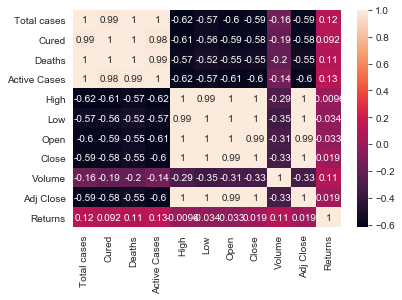

In [36]:
#making a heatmap to see the correlation
sns.heatmap(result.corr(),annot=True);

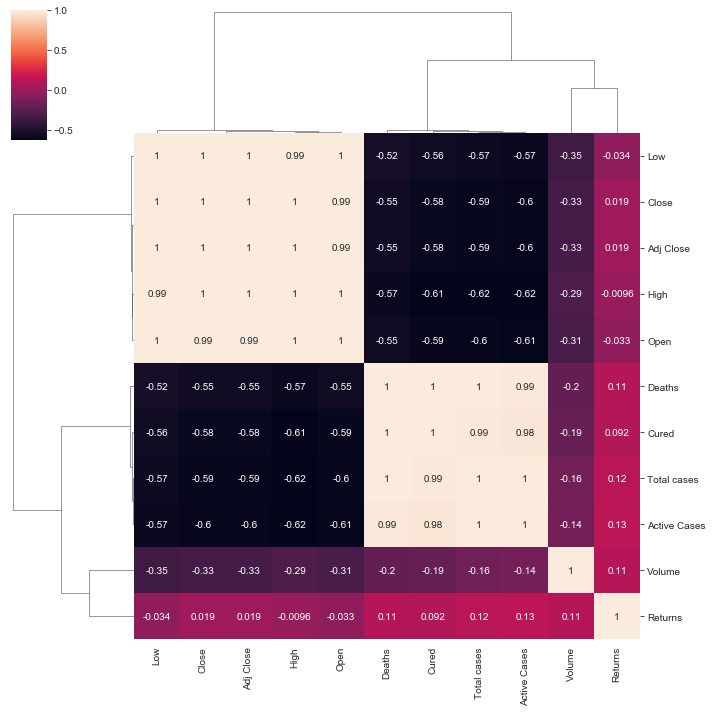

In [37]:
#making a clustermap to see the correlation
sns.clustermap(result.corr(),annot=True)

We can see that the Closing price has following correlations:  


1.   with Total cases  : -0.59
2.   with Cured        : -0.58
3.   with Deaths       : -0.55
4.   with Active cases : -0.60  
But there is multicollinearity between Total cases, Cured, Deaths and Active cases  
So lets just take Total cases


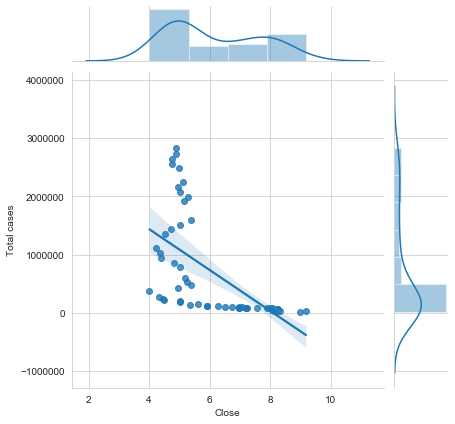

In [38]:
#making a jointgrid using regression plot and distribution plot
g = sns.JointGrid(x=result['Close'], y=result['Total cases'], data=result)
g = g.plot(sns.regplot, sns.distplot) #seabron grids lect4

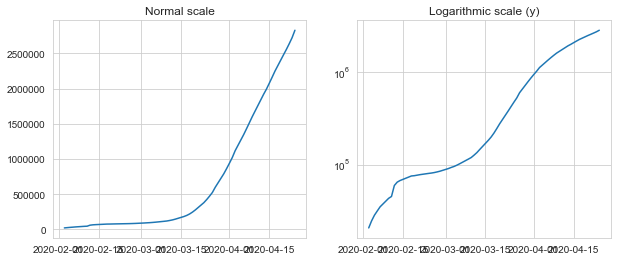

In [39]:
#Plotting the total cases with respect to date using a normal scale and log scale
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(result.index, result['Total cases'], result['Total cases'], np.exp(result['Total cases']))
axes[0].set_title("Normal scale")

axes[1].plot(result.index, result['Total cases'], result['Total cases'], np.exp(result['Total cases']))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

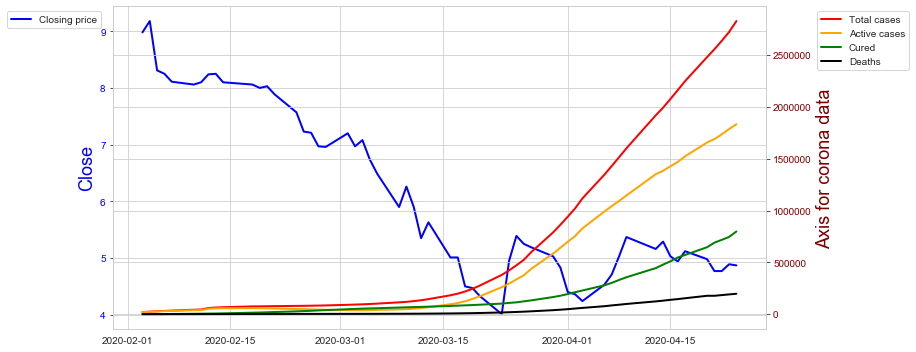

In [40]:
#Comparing the closing price with the Total cases, Active cases, Cured, Deaths
fig, ax1 = plt.subplots(figsize=(13,5))

ax1.plot(result.index, result['Close'], lw=2, color="blue", label='Closing price')
ax1.set_ylabel("Close", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
plt.legend(bbox_to_anchor=(-0.01, 1), loc='upper right')
plt.tight_layout()

ax2 = ax1.twinx()
ax2.plot(result.index, result['Total cases'], lw=2, color="red", label='Total cases')
ax2.plot(result.index, result['Active Cases'], lw=2, color="orange", label='Active cases')
ax2.plot(result.index, result['Cured'], lw=2, color="green", label='Cured')
ax2.plot(result.index, result['Deaths'], lw=2, color="black", label ='Deaths')
ax2.set_ylabel("Axis for corona data", fontsize=18, color="maroon")
for label in ax2.get_yticklabels():
    label.set_color("maroon")
    
plt.legend(bbox_to_anchor=(1.07, 1.0), loc='upper left')
plt.tight_layout()
plt.show();

This shows how the closing price of the stock is varying with increase in Corona patients, Cured people, Deaths  and Active cases.